In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Birthday paradox

**Problem 1a.** During exercise session, we showed that for $d$ equally likely dates in a year and $n$ people, the probability of a repeat date is $p(n)=1-\frac{d^\underline{n}}{d^n}$. We also derived a simple approximate formula for this probability: $p_a(n) = 1-e^{-\frac{n(n-1)}{2d}}$. In particular, this approximation implies that for $d=365$ dates, $p(n)$ is close to $\frac{1}{2}$ for $n=23$.

Verify how good the approximation is. To this end, write a program that computes the exact value of $p(n)$ as well as the value of the approximation $p_a(n)$ for $d=365$ and $n=1,\ldots,60$. Plot the graphs of the two functions.

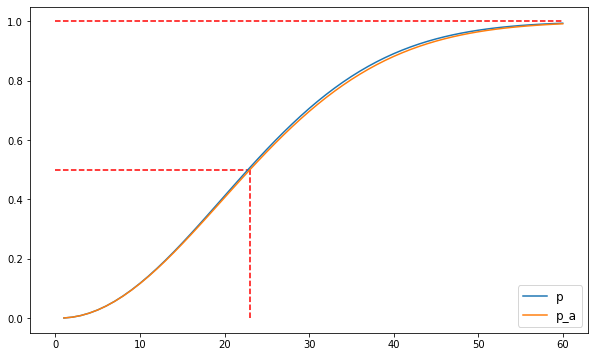

In [2]:
# pure Python implementation
def p(d, n):
    v = 1.0
    for i in range(n):
        v = v * (d - i) / d
    return 1 - v


# numpy implementation
def p_numpy(d, n):
    d_fact = np.arange(d, d - n, step=-1, dtype=np.float32)
    d = np.repeat(d, n)
    return 1. - np.prod(d_fact / d)
    

def p_a(d, n):
    return 1 - math.exp(-0.5 * n * (n - 1) / d)


d = 365
n = 60
x = range(1, n + 1)

# list comprehensions
y = [p(d, i) for i in x]
y_numpy = [p_numpy(d, i) for i in x]
y_a = [p_a(d, i) for i in x]

# check if numpy version and Python give the same results
assert np.isclose(y, y_numpy).all()

# create plot
plt.figure(figsize=(10,6))
x_plot, = plt.plot(x, y, label="p")
x_a_plot, = plt.plot(x, y_a, label="p_a")
plt.hlines([0.5,1.0], [0,0], [23,60], colors='red', linestyles='dashed')
plt.vlines([23], [0], [0.5], colors='red', linestyles='dashed')

plt.legend(handles=[x_plot, x_a_plot], loc=4, fontsize='large')
plt.show()

# we can see that the approximation is relatively good

**Problem 1b.**
Implement a function, that chooses random dates out of $1,\ldots,d$ until a repeat occurs. The function should return the number of the step in which that happened. Run the function $N=100\,000$ times.
    * Plot a histogram of the return values.
    * Which return value seems most likely? 
    * What is the average of the return values?
    * Is there any simple relation between these two numbers and the value $23$ in the previous problem?
    * Is there any simple relation between the histogram obtained, and the plot in the previous problem?

In [3]:
import random


def dates(d):
    s = set()
    for k in range(d + 1):
        x = random.randint(1, d)  # alternative: np.random.randint(1, d + 1)
        if x in s:
            return k + 1
        else:
            s.add(x)


d = 365
sample = [dates(d) for iter in range(100000)]

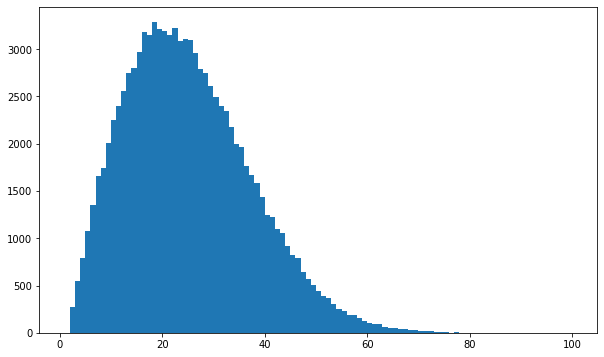

Couple first most likely values: [18, 22, 19, 20, 16, 21, 17, 24, 25, 23]
Average value: 24.62698
Average value using numpy: 24.62698


In [4]:
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=range(1, 101))
plt.show()

# calcultating most probable values in pure Python
k_counts = sorted(list(set(sample)), key=sample.count, reverse=True)

# numpy version
vals, counts = np.unique(sample, return_counts=True)
k_counts_numpy = vals[np.argsort(counts)][::-1]

# check numpy results
# for all values there may be problems with ties so check only first 10 (still might fail rarely)
assert (k_counts_numpy[:10] == k_counts[:10]).all()

print('Couple first most likely values: {}'.format(k_counts[:10]))

print('Average value: {}'.format(float(sum(sample)) / len(sample)))
print('Average value using numpy: {}'.format(np.mean(sample)))

**Problem 1c.** Here we investigate how our analysis using the classical approach compares to a more empirical one. The file *us_births_69_88.csv* contains the counts for birthdates from 1969 to 1988. Only those births, for which the full date is known, are included in the file.
    * Read the file.
    * Investigate the data. Do you notice anything strange?
    * Plot a heatmap of the data. Do you notice any significant deviations from the uniform assumption? Can you explain them?
    * Implement a sampling function as in 1b, but this time using the supplied data. Compare the results.